# Computer Infrastructure Assignment 2025 

### Submission by Faolán H
-----

## Modules used throughout the assignment 

Standard python modules are imported first as per good practise guidelines

### Source documentation for the modules:
- datetime (https://docs.python.org/3/library/datetime.html)
- Pandas (https://pandas.pydata.org/docs/)
- Matplotlib (https://matplotlib.org/stable/api/pyplot_summary.html)
- yfinance (https://github.com/ranaroussi/yfinance)


In [19]:
# datetime - formatting date and time date
import datetime as dt

# pandas - generating DataFrames and plotting them
import pandas as pd

# matplotlib.pyplot - having more plotting functionality
import matplotlib.pyplot as plt

# Yahoo Finance API data - the stock data being analysed
import yfinance as yf

-----

## There are four problems in this assignment structured throughout this Jupyter Notebook as follows:
### - Name the Problem
### - Describe the Problem
### - Solve the Problem
----------

## Problem 1: Data from yfinance

### Name the Problem
##### Using the yfinance Python package, write a function called get_data() that downloads all hourly data for the previous five days for the five FAANG stocks:

- Facebook (META)
- Apple (AAPL)
- Amazon (AMZN)
- Netflix (NFLX)
- Google (GOOG)
##### The function should save the data into a folder called data in the root of your repository using a filename with the format YYYYMMDD-HHmmss.csv where YYYYMMDD is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. 09 for September), followed by the two digit day, and HHmmss is hour, minutes, seconds. Create the data folder if you don't already have one.

### Describe the Problem
##### There are several steps that need to be taken to solve the problem:
- Bring in the data
- Format it in the correct way
- Create a csv of the data, which is to be placed in a data folder

### Solve the Problem

# yfinance download documentation
https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html

##### The abbreviated name of the relevant stock names has been provided. To find these abbreviated names, you can search on the official yahoo finance website (https://finance.yahoo.com/)

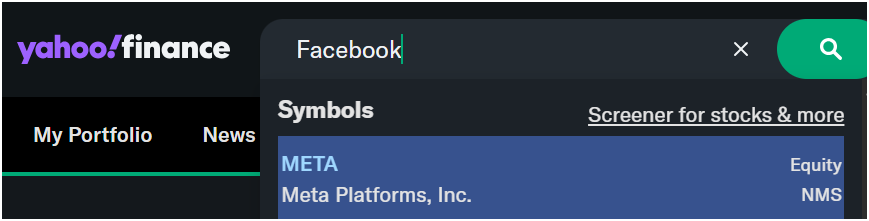

In [2]:
# Setting the DataFrame. This includes the data for the FAANG companies at a period of 5 days and 60 minute intervals
df = yf.download ('META AAPL AMZN NFLX GOOG', period = '5d', interval = '60m')
df.head(3)# Show the first three rows of the DataFrame to check column names and data structure.

/tmp/ipykernel_17385/452097128.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download ('META AAPL AMZN NFLX GOOG', period = '5d', interval = '60m')
[*********************100%***********************]  5 of 5 completed


Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-11-17 14:30:00+00:00  269.279999  230.725006  290.899994  607.400024   
2025-11-17 15:30:00+00:00  267.879913  232.419998  288.450012  606.299988   
2025-11-17 16:30:00+00:00  268.920013  233.520004  289.011810  606.849976   

Price                                        High                          \
Ticker                           NFLX        AAPL        AMZN        GOOG   
Datetime                                                                    
2025-11-17 14:30:00+00:00  111.029999  270.489990  234.600006  294.500000   
2025-11-17 15:30:00+00:00  110.370003  269.390015  232.500000  291.529999   
2025-11-17 16:30:00+00:00  111.209999  269.549988  233.824997  290.359985   

Price                                              ...        Open  \
Ticker                           META        NFLX  ...        AAPL   
Datetime                                           ...               
2025-11-17 14:30:00+00:00  611.690002  111.849998  ...  268.720001   
2025-11-17 15:30:00+00:00  608.479919  111.370003  ...  269.230011   
2025-11-17 16:30:00+00:00  608.820007  111.470001  ...  267.850006   

Price                                                                      \
Ticker                           AMZN        GOOG        META        NFLX   
Datetime                                                                    
2025-11-17 14:30:00+00:00  232.945007  286.135010  609.034973  110.779999   
2025-11-17 15:30:00+00:00  230.699997  290.899994  607.300110  111.025803   
2025-11-17 16:30:00+00:00  232.449997  288.470490  606.250000  110.369904   

Price                       Volume                                       
Ticker                        AAPL      AMZN     GOOG     META     NFLX  
Datetime                                                                 
2025-11-17 14:30:00+00:00  8509806  11162624  9825496  2585815  4796429  
2025-11-17 15:30:00+00:00  3379761   6793002  2897454  1127617  2212014  
2025-11-17 16:30:00+00:00  2089997   4128759  2043947   848823  1724155  

[3 rows x 25 columns]

In [3]:
# Looking at the dataframe index to ensure there are 60m intervals
df.index

DatetimeIndex(['2025-11-17 14:30:00+00:00', '2025-11-17 15:30:00+00:00',
               '2025-11-17 16:30:00+00:00', '2025-11-17 17:30:00+00:00',
               '2025-11-17 18:30:00+00:00', '2025-11-17 19:30:00+00:00',
               '2025-11-17 20:30:00+00:00', '2025-11-18 14:30:00+00:00',
               '2025-11-18 15:30:00+00:00', '2025-11-18 16:30:00+00:00',
               '2025-11-18 17:30:00+00:00', '2025-11-18 18:30:00+00:00',
               '2025-11-18 19:30:00+00:00', '2025-11-18 20:30:00+00:00',
               '2025-11-19 14:30:00+00:00', '2025-11-19 15:30:00+00:00',
               '2025-11-19 16:30:00+00:00', '2025-11-19 17:30:00+00:00',
               '2025-11-19 18:30:00+00:00', '2025-11-19 19:30:00+00:00',
               '2025-11-19 20:30:00+00:00', '2025-11-20 14:30:00+00:00',
               '2025-11-20 15:30:00+00:00', '2025-11-20 16:30:00+00:00',
               '2025-11-20 17:30:00+00:00', '2025-11-20 18:30:00+00:00',
               '2025-11-20 19:30:00+00:00', '2025-1

#### This outputs the results as defined in the dataframe into comma separated values using datetime
#### Source datetime.today(): https://docs.python.org/3/library/datetime.html#datetime.datetime.today

In [4]:
# The dataframe is created from data from the past five working days, and so today's date is being used
today = dt.datetime.today()

#### Source strftime: https://docs.python.org/3/library/datetime.html#datetime.datetime.today

In [5]:
# This formats today into an order that suits the file output name
today_format = today.strftime("%Y.%m.%d_%H.%M.%S")

#### Source Pandas DataFrame: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html

In [6]:
# This brings together the data and format name into a folder specifically created for the outputs
df.to_csv("data/" + "faangdata_" + today_format + ".csv")

-----
## Problem 2: Plotting the data

##### Write a function called plot_data() that opens the latest data file in the data folder and, on one plot, plots the Close prices for each of the five stocks. The plot should include axis labels, a legend, and the date as a title. The function should save the plot into a plots folder in the root of your repository using a filename in the format YYYYMMDD-HHmmss.png. Create the plots folder if you don't already have one.

In [7]:
df.columns

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'AMZN'),
            ( 'Close', 'GOOG'),
            ( 'Close', 'META'),
            ( 'Close', 'NFLX'),
            (  'High', 'AAPL'),
            (  'High', 'AMZN'),
            (  'High', 'GOOG'),
            (  'High', 'META'),
            (  'High', 'NFLX'),
            (   'Low', 'AAPL'),
            (   'Low', 'AMZN'),
            (   'Low', 'GOOG'),
            (   'Low', 'META'),
            (   'Low', 'NFLX'),
            (  'Open', 'AAPL'),
            (  'Open', 'AMZN'),
            (  'Open', 'GOOG'),
            (  'Open', 'META'),
            (  'Open', 'NFLX'),
            ('Volume', 'AAPL'),
            ('Volume', 'AMZN'),
            ('Volume', 'GOOG'),
            ('Volume', 'META'),
            ('Volume', 'NFLX')],
           names=['Price', 'Ticker'])

#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
#Saving figures: Stack overflow (https://stackoverflow.com/questions/9622163/save-plot-to-image-file-instead-of-displaying-it)

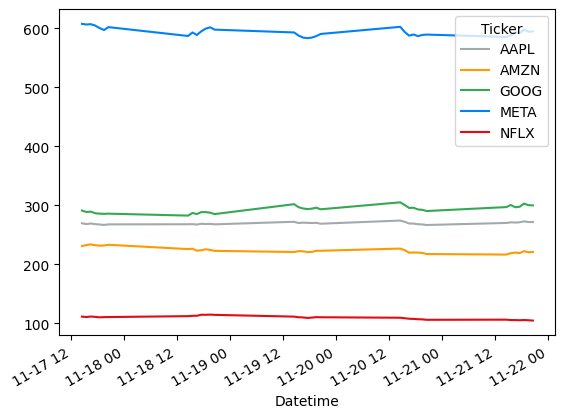

In [29]:
# Adding more functionality to the plot using fig,ax
fig, ax = plt.subplots()
# Using the company colours
colours = ('#A2AAAD', '#FF9900', '#34A853', '#0081FB', '#E50914')
# ploting all closing prices in the DataFrame
df['Close'].plot(color=colours, ax=ax);
# Save the figure into the plot folder as a webp which displays a higher quality image digitally with lower storage
fig.savefig('plots/23.11.25test.webp', dpi = 500)

In [10]:
# date.max 
# https://docs.python.org/3/library/datetime.html
data = open('data/faangdata_2025.11.02_17.06.55.csv')
data

<_io.TextIOWrapper name='data/faangdata_2025.11.02_17.06.55.csv' mode='r' encoding='UTF-8'>

In [11]:
# https://stackoverflow.com/questions/75539438/get-a-dataframe-from-a-python-notebook-ipynb-to-another
plotdata = pd.read_csv('data/faangdata_2025.11.02_17.06.55.csv')

-----
## Problem 3: Script
##### Create a Python script called faang.py in the root of your repository. Copy the above functions into it and it so that whenever someone at the terminal types ./faang.py, the script runs, downloading the data and creating the plot. Note that this will require a shebang line and the script to be marked executable. Explain the steps you took in your notebook.

-----
## Problem 4: Automation
##### Create a GitHub Actions workflow to run your script every Saturday morning. The script should be called faang.yml in a .github/workflows/ folder in the root of your repository. In your notebook, explain each of the individual lines in your workflow.

-----
# END
-----